### Loading the Data

In [243]:
import pandas as pd

In [244]:
df = pd.read_csv('./Australian Vehicle Prices.csv')

In [245]:
df.head()

Brand    Year   Model               Car/Suv  \
0      Ssangyong  2022.0  Rexton  Sutherland Isuzu Ute   
1             MG  2022.0     MG3             Hatchback   
2            BMW  2022.0    430I                 Coupe   
3  Mercedes-Benz  2011.0    E500                 Coupe   
4        Renault  2022.0  Arkana                   SUV   

                                       Title UsedOrNew Transmission  \
0       2022 Ssangyong Rexton Ultimate (awd)      DEMO    Automatic   
1  2022 MG MG3 Auto Excite (with Navigation)      USED    Automatic   
2                      2022 BMW 430I M Sport      USED    Automatic   
3           2011 Mercedes-Benz E500 Elegance      USED    Automatic   
4                 2022 Renault Arkana Intens      USED    Automatic   

         Engine DriveType  FuelType FuelConsumption Kilometres   ColourExtInt  \
0  4 cyl, 2.2 L       AWD    Diesel  8.7 L / 100 km       5595  White / Black   
1  4 cyl, 1.5 L     Front   Premium  6.7 L / 100 km         16  Black / Black   
2    4 cyl, 2 L      Rear   Premium  6.6 L / 100 km       8472   Grey / White   
3  8 cyl, 5.5 L      Rear   Premium   11 L / 100 km     136517  White / Brown   
4  4 cyl, 1.3 L     Front  Unleaded    6 L / 100 km       1035   Grey / Black   

            Location CylindersinEngine   BodyType     Doors     Seats   Price  
0     Caringbah, NSW             4 cyl        SUV   4 Doors   7 Seats   51990  
1     Brookvale, NSW             4 cyl  Hatchback   5 Doors   5 Seats   19990  
2      Sylvania, NSW             4 cyl      Coupe   2 Doors   4 Seats  108988  
3  Mount Druitt, NSW             8 cyl      Coupe   2 Doors   4 Seats   32990  
4   Castle Hill, NSW             4 cyl        SUV   4 Doors   5 Seats   34990

In [246]:
df.shape

(16734, 19)

In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16734 entries, 0 to 16733
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              16733 non-null  object 
 1   Year               16733 non-null  float64
 2   Model              16733 non-null  object 
 3   Car/Suv            16706 non-null  object 
 4   Title              16733 non-null  object 
 5   UsedOrNew          16733 non-null  object 
 6   Transmission       16733 non-null  object 
 7   Engine             16733 non-null  object 
 8   DriveType          16733 non-null  object 
 9   FuelType           16733 non-null  object 
 10  FuelConsumption    16733 non-null  object 
 11  Kilometres         16733 non-null  object 
 12  ColourExtInt       16733 non-null  object 
 13  Location           16284 non-null  object 
 14  CylindersinEngine  16733 non-null  object 
 15  BodyType           16452 non-null  object 
 16  Doors              151

#### Checking for missing values

In [248]:
df.isna().sum()

Brand                   1
Year                    1
Model                   1
Car/Suv                28
Title                   1
UsedOrNew               1
Transmission            1
Engine                  1
DriveType               1
FuelType                1
FuelConsumption         1
Kilometres              1
ColourExtInt            1
Location              450
CylindersinEngine       1
BodyType              282
Doors                1604
Seats                1705
Price                   3
dtype: int64

In [249]:
df.isna().mean() * 100

Brand                 0.005976
Year                  0.005976
Model                 0.005976
Car/Suv               0.167324
Title                 0.005976
UsedOrNew             0.005976
Transmission          0.005976
Engine                0.005976
DriveType             0.005976
FuelType              0.005976
FuelConsumption       0.005976
Kilometres            0.005976
ColourExtInt          0.005976
Location              2.689136
CylindersinEngine     0.005976
BodyType              1.685192
Doors                 9.585275
Seats                10.188837
Price                 0.017928
dtype: float64

since the missing values percentage is very small, it's safe to delete and continue exploration

In [250]:
df.dropna(inplace=True)

In [251]:
# confirming that missing values does not exist in the dataframe

df.isna().sum()

Brand                0
Year                 0
Model                0
Car/Suv              0
Title                0
UsedOrNew            0
Transmission         0
Engine               0
DriveType            0
FuelType             0
FuelConsumption      0
Kilometres           0
ColourExtInt         0
Location             0
CylindersinEngine    0
BodyType             0
Doors                0
Seats                0
Price                0
dtype: int64

## Data Cleaning

In [252]:
df.dtypes

Brand                 object
Year                 float64
Model                 object
Car/Suv               object
Title                 object
UsedOrNew             object
Transmission          object
Engine                object
DriveType             object
FuelType              object
FuelConsumption       object
Kilometres            object
ColourExtInt          object
Location              object
CylindersinEngine     object
BodyType              object
Doors                 object
Seats                 object
Price                 object
dtype: object

In [253]:
# define a function that will handle converting from object type to numeric type

def extract_number(data: pd.DataFrame, column: str, pattern: str) -> pd.Series:
    return data[column].str.extract(pattern, expand=False).astype('float32')


In [254]:
# Handle the Price columns 
# convert columns from object datatype to floating point data type

df['Price'].unique()

array(['51990', '19990', '108988', ..., '32856', '36770', '35280'],
      dtype=object)

In [255]:
df['Price'] = df['Price'].astype(float)

ValueError: could not convert string to float: 'POA'

In [ ]:
df[df['Price'] == 'POA']

In [256]:
# filter out all the columns with POA as its price value

df = df[df['Price'] != 'POA']

In [257]:
# confirm that the filter works

df[df['Price'] == 'POA']

Empty DataFrame
Columns: [Brand, Year, Model, Car/Suv, Title, UsedOrNew, Transmission, Engine, DriveType, FuelType, FuelConsumption, Kilometres, ColourExtInt, Location, CylindersinEngine, BodyType, Doors, Seats, Price]
Index: []

In [258]:
# convert price column to numerical type

df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

In [259]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14551 entries, 0 to 16733
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              14551 non-null  object 
 1   Year               14551 non-null  float64
 2   Model              14551 non-null  object 
 3   Car/Suv            14551 non-null  object 
 4   Title              14551 non-null  object 
 5   UsedOrNew          14551 non-null  object 
 6   Transmission       14551 non-null  object 
 7   Engine             14551 non-null  object 
 8   DriveType          14551 non-null  object 
 9   FuelType           14551 non-null  object 
 10  FuelConsumption    14551 non-null  object 
 11  Kilometres         14551 non-null  object 
 12  ColourExtInt       14551 non-null  object 
 13  Location           14551 non-null  object 
 14  CylindersinEngine  14551 non-null  object 
 15  BodyType           14551 non-null  object 
 16  Doors              14551 no

#### Handling kilometer

In [260]:
df['Kilometres'].unique()

array(['5595', '16', '8472', ..., '5165', '85525', '31852'], dtype=object)

In [261]:
df['Kilometres'] = pd.to_numeric(df['Price'], errors='coerce')

In [262]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14551 entries, 0 to 16733
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              14551 non-null  object 
 1   Year               14551 non-null  float64
 2   Model              14551 non-null  object 
 3   Car/Suv            14551 non-null  object 
 4   Title              14551 non-null  object 
 5   UsedOrNew          14551 non-null  object 
 6   Transmission       14551 non-null  object 
 7   Engine             14551 non-null  object 
 8   DriveType          14551 non-null  object 
 9   FuelType           14551 non-null  object 
 10  FuelConsumption    14551 non-null  object 
 11  Kilometres         14551 non-null  int64  
 12  ColourExtInt       14551 non-null  object 
 13  Location           14551 non-null  object 
 14  CylindersinEngine  14551 non-null  object 
 15  BodyType           14551 non-null  object 
 16  Doors              14551 no

#### Handling Year

In [263]:
df['Year'].unique()

array([2022., 2011., 2017., 2000., 2013., 2014., 2018., 2016., 2012.,
       2023., 2005., 2015., 2019., 2021., 2007., 2010., 2003., 2008.,
       2006., 2009., 2020., 1999., 2004., 2002., 1995., 2001., 1985.,
       1998., 1997., 1986., 1996., 1994., 1990., 1993., 1991., 1989.,
       1984., 1978., 1992.])

In [264]:
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14551 entries, 0 to 16733
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              14551 non-null  object 
 1   Year               14551 non-null  float64
 2   Model              14551 non-null  object 
 3   Car/Suv            14551 non-null  object 
 4   Title              14551 non-null  object 
 5   UsedOrNew          14551 non-null  object 
 6   Transmission       14551 non-null  object 
 7   Engine             14551 non-null  object 
 8   DriveType          14551 non-null  object 
 9   FuelType           14551 non-null  object 
 10  FuelConsumption    14551 non-null  object 
 11  Kilometres         14551 non-null  int64  
 12  ColourExtInt       14551 non-null  object 
 13  Location           14551 non-null  object 
 14  CylindersinEngine  14551 non-null  object 
 15  BodyType           14551 non-null  object 
 16  Doors              14551 no

#### Handling FuelConsumption

In [266]:
# since FuelConsumption is in L / 100 km it's safe to remove this value from the columns

replace_value = lambda fuel_str: float(fuel_str.replace(' L / 100 km', ''))

df['FuelConsumption'] = df['FuelConsumption'].apply(replace_value)
df['FuelConsumption'] = df['FuelConsumption'].astype(float)

df['FuelConsumption'].head()

0     8.7
1     6.7
2     6.6
3    11.0
4     6.0
Name: FuelConsumption, dtype: float64

#### Handling CylindersinEngine

In [267]:
df['CylindersinEngine'].unique()

array(['4 cyl', '8 cyl', '3 cyl', '6 cyl', '5 cyl', '12 cyl', '0 L',
       '2 cyl', '10 cyl'], dtype=object)

In [268]:
my_test = "Hello22 wel123come"

import re

re.sub('\D', '', my_test)

'22123'

In [269]:
df['CylindersinEngine'] = extract_number(df, column='CylindersinEngine', pattern=r'(\d+) (?:cyl|L)')
df['CylindersinEngine'] = df['CylindersinEngine'].astype(float)
df['CylindersinEngine'].head()

0    4.0
1    4.0
2    4.0
3    8.0
4    4.0
Name: CylindersinEngine, dtype: float64

In [270]:
df['Doors'] = extract_number(df, column='Doors', pattern=r'(\d+) Doors')
df['Doors'] = df['Doors'].astype(float)
df['Doors'].head()

0    4.0
1    5.0
2    2.0
3    2.0
4    4.0
Name: Doors, dtype: float32

In [271]:
df['Seats'] = extract_number(df, column='Seats', pattern=r'(\d+) Seats')
df['Seats'] = df['Seats'].astype(float)
df['Seats'].head()

0    7.0
1    5.0
2    4.0
3    4.0
4    5.0
Name: Seats, dtype: float32

In [272]:
# verifying the changed made

df.head()

Brand    Year   Model               Car/Suv  \
0      Ssangyong  2022.0  Rexton  Sutherland Isuzu Ute   
1             MG  2022.0     MG3             Hatchback   
2            BMW  2022.0    430I                 Coupe   
3  Mercedes-Benz  2011.0    E500                 Coupe   
4        Renault  2022.0  Arkana                   SUV   

                                       Title UsedOrNew Transmission  \
0       2022 Ssangyong Rexton Ultimate (awd)      DEMO    Automatic   
1  2022 MG MG3 Auto Excite (with Navigation)      USED    Automatic   
2                      2022 BMW 430I M Sport      USED    Automatic   
3           2011 Mercedes-Benz E500 Elegance      USED    Automatic   
4                 2022 Renault Arkana Intens      USED    Automatic   

         Engine DriveType  FuelType  FuelConsumption  Kilometres  \
0  4 cyl, 2.2 L       AWD    Diesel              8.7       51990   
1  4 cyl, 1.5 L     Front   Premium              6.7       19990   
2    4 cyl, 2 L      Rear   Premium              6.6      108988   
3  8 cyl, 5.5 L      Rear   Premium             11.0       32990   
4  4 cyl, 1.3 L     Front  Unleaded              6.0       34990   

    ColourExtInt           Location  CylindersinEngine   BodyType  Doors  \
0  White / Black     Caringbah, NSW                4.0        SUV    4.0   
1  Black / Black     Brookvale, NSW                4.0  Hatchback    5.0   
2   Grey / White      Sylvania, NSW                4.0      Coupe    2.0   
3  White / Brown  Mount Druitt, NSW                8.0      Coupe    2.0   
4   Grey / Black   Castle Hill, NSW                4.0        SUV    4.0   

   Seats   Price  
0    7.0   51990  
1    5.0   19990  
2    4.0  108988  
3    4.0   32990  
4    5.0   34990

### Feature Engineering

I will be generating the following features
1. CarAge (how old is the car), this will be gotten from the 'Year' column
2. Mileage (distance the car has covered)

Mileage(km/L) = 100 / FuelConsumption(L/100km)

In [273]:
from datetime import datetime

current_year = datetime.now().year

df['CarAge'] = current_year - df['Year']

df['CarAge']

0         2.0
1         2.0
2         2.0
3        13.0
4         2.0
         ... 
16727     9.0
16728     3.0
16731     2.0
16732     8.0
16733     3.0
Name: CarAge, Length: 14551, dtype: float64

In [274]:
# df['Mileage'] = 100 / (df['FuelConsumption'] if df['FuelConsumption'] > 0 else 1)
# df['Mileage'].head()
# Replace non-positive 'FuelConsumption' values with 1 to avoid division by zero
df['AdjustedFuelConsumption'] = df['FuelConsumption'].where(df['FuelConsumption'] > 0, 1)

# Calculate 'Mileage'
df['Mileage'] = 100 / df['AdjustedFuelConsumption']

In [275]:
df.head()

Brand    Year   Model               Car/Suv  \
0      Ssangyong  2022.0  Rexton  Sutherland Isuzu Ute   
1             MG  2022.0     MG3             Hatchback   
2            BMW  2022.0    430I                 Coupe   
3  Mercedes-Benz  2011.0    E500                 Coupe   
4        Renault  2022.0  Arkana                   SUV   

                                       Title UsedOrNew Transmission  \
0       2022 Ssangyong Rexton Ultimate (awd)      DEMO    Automatic   
1  2022 MG MG3 Auto Excite (with Navigation)      USED    Automatic   
2                      2022 BMW 430I M Sport      USED    Automatic   
3           2011 Mercedes-Benz E500 Elegance      USED    Automatic   
4                 2022 Renault Arkana Intens      USED    Automatic   

         Engine DriveType  FuelType  ...   ColourExtInt           Location  \
0  4 cyl, 2.2 L       AWD    Diesel  ...  White / Black     Caringbah, NSW   
1  4 cyl, 1.5 L     Front   Premium  ...  Black / Black     Brookvale, NSW   
2    4 cyl, 2 L      Rear   Premium  ...   Grey / White      Sylvania, NSW   
3  8 cyl, 5.5 L      Rear   Premium  ...  White / Brown  Mount Druitt, NSW   
4  4 cyl, 1.3 L     Front  Unleaded  ...   Grey / Black   Castle Hill, NSW   

  CylindersinEngine   BodyType  Doors Seats   Price  CarAge  \
0               4.0        SUV    4.0   7.0   51990     2.0   
1               4.0  Hatchback    5.0   5.0   19990     2.0   
2               4.0      Coupe    2.0   4.0  108988     2.0   
3               8.0      Coupe    2.0   4.0   32990    13.0   
4               4.0        SUV    4.0   5.0   34990     2.0   

   AdjustedFuelConsumption    Mileage  
0                      8.7  11.494253  
1                      6.7  14.925373  
2                      6.6  15.151515  
3                     11.0   9.090909  
4                      6.0  16.666667  

[5 rows x 22 columns]

### Data Encoding

In [276]:
df['Transmission'].unique()

array(['Automatic', 'Manual', '-'], dtype=object)

In [277]:
# removing the '-' from transmission
df = df[df['Transmission'] != '-']

df.shape

(14520, 22)

In [278]:
df['Transmission'].unique()

array(['Automatic', 'Manual'], dtype=object)

In [279]:
df.head()

Brand    Year   Model               Car/Suv  \
0      Ssangyong  2022.0  Rexton  Sutherland Isuzu Ute   
1             MG  2022.0     MG3             Hatchback   
2            BMW  2022.0    430I                 Coupe   
3  Mercedes-Benz  2011.0    E500                 Coupe   
4        Renault  2022.0  Arkana                   SUV   

                                       Title UsedOrNew Transmission  \
0       2022 Ssangyong Rexton Ultimate (awd)      DEMO    Automatic   
1  2022 MG MG3 Auto Excite (with Navigation)      USED    Automatic   
2                      2022 BMW 430I M Sport      USED    Automatic   
3           2011 Mercedes-Benz E500 Elegance      USED    Automatic   
4                 2022 Renault Arkana Intens      USED    Automatic   

         Engine DriveType  FuelType  ...   ColourExtInt           Location  \
0  4 cyl, 2.2 L       AWD    Diesel  ...  White / Black     Caringbah, NSW   
1  4 cyl, 1.5 L     Front   Premium  ...  Black / Black     Brookvale, NSW   
2    4 cyl, 2 L      Rear   Premium  ...   Grey / White      Sylvania, NSW   
3  8 cyl, 5.5 L      Rear   Premium  ...  White / Brown  Mount Druitt, NSW   
4  4 cyl, 1.3 L     Front  Unleaded  ...   Grey / Black   Castle Hill, NSW   

  CylindersinEngine   BodyType  Doors Seats   Price  CarAge  \
0               4.0        SUV    4.0   7.0   51990     2.0   
1               4.0  Hatchback    5.0   5.0   19990     2.0   
2               4.0      Coupe    2.0   4.0  108988     2.0   
3               8.0      Coupe    2.0   4.0   32990    13.0   
4               4.0        SUV    4.0   5.0   34990     2.0   

   AdjustedFuelConsumption    Mileage  
0                      8.7  11.494253  
1                      6.7  14.925373  
2                      6.6  15.151515  
3                     11.0   9.090909  
4                      6.0  16.666667  

[5 rows x 22 columns]

In [280]:
# convert all automatic values to 0 and manual to 1
df['Transmission'] = (df['Transmission'] == 'Manual').astype(int)

df.head()

Brand    Year   Model               Car/Suv  \
0      Ssangyong  2022.0  Rexton  Sutherland Isuzu Ute   
1             MG  2022.0     MG3             Hatchback   
2            BMW  2022.0    430I                 Coupe   
3  Mercedes-Benz  2011.0    E500                 Coupe   
4        Renault  2022.0  Arkana                   SUV   

                                       Title UsedOrNew  Transmission  \
0       2022 Ssangyong Rexton Ultimate (awd)      DEMO             0   
1  2022 MG MG3 Auto Excite (with Navigation)      USED             0   
2                      2022 BMW 430I M Sport      USED             0   
3           2011 Mercedes-Benz E500 Elegance      USED             0   
4                 2022 Renault Arkana Intens      USED             0   

         Engine DriveType  FuelType  ...   ColourExtInt           Location  \
0  4 cyl, 2.2 L       AWD    Diesel  ...  White / Black     Caringbah, NSW   
1  4 cyl, 1.5 L     Front   Premium  ...  Black / Black     Brookvale, NSW   
2    4 cyl, 2 L      Rear   Premium  ...   Grey / White      Sylvania, NSW   
3  8 cyl, 5.5 L      Rear   Premium  ...  White / Brown  Mount Druitt, NSW   
4  4 cyl, 1.3 L     Front  Unleaded  ...   Grey / Black   Castle Hill, NSW   

  CylindersinEngine   BodyType  Doors Seats   Price  CarAge  \
0               4.0        SUV    4.0   7.0   51990     2.0   
1               4.0  Hatchback    5.0   5.0   19990     2.0   
2               4.0      Coupe    2.0   4.0  108988     2.0   
3               8.0      Coupe    2.0   4.0   32990    13.0   
4               4.0        SUV    4.0   5.0   34990     2.0   

   AdjustedFuelConsumption    Mileage  
0                      8.7  11.494253  
1                      6.7  14.925373  
2                      6.6  15.151515  
3                     11.0   9.090909  
4                      6.0  16.666667  

[5 rows x 22 columns]

### look through the dataset and determine the categorical and numerical columns

In [281]:
# Get the numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()
numerical_columns

['Year',
 'Transmission',
 'FuelConsumption',
 'Kilometres',
 'CylindersinEngine',
 'Doors',
 'Seats',
 'Price',
 'CarAge',
 'AdjustedFuelConsumption',
 'Mileage']

In [282]:
# Get the categorical columns
categorical_columns = df.select_dtypes(exclude=['number']).columns.tolist()

In [283]:
df.describe()

Year  Transmission  FuelConsumption     Kilometres  \
count  14520.000000  14520.000000     14520.000000   14520.000000   
mean    2016.211708      0.117011         7.738822   34853.952548   
std        4.918085      0.321444         2.209246   28625.851095   
min     1978.000000      0.000000         0.000000      88.000000   
25%     2013.000000      0.000000         6.600000   18990.000000   
50%     2017.000000      0.000000         7.600000   28990.000000   
75%     2020.000000      0.000000         8.800000   42451.250000   
max     2023.000000      1.000000        27.000000  649880.000000   

       CylindersinEngine         Doors         Seats          Price  \
count       14520.000000  14520.000000  14520.000000   14520.000000   
mean            4.423003      4.023554      5.123072   34853.952548   
std             1.100999      0.670103      1.087581   28625.851095   
min             0.000000      2.000000      2.000000      88.000000   
25%             4.000000      4.000000      5.000000   18990.000000   
50%             4.000000      4.000000      5.000000   28990.000000   
75%             4.000000      4.000000      5.000000   42451.250000   
max            12.000000      5.000000     22.000000  649880.000000   

             CarAge  AdjustedFuelConsumption       Mileage  
count  14520.000000             14520.000000  14520.000000  
mean       7.788292                 7.755076     14.952507  
std        4.918085                 2.155267     11.573636  
min        1.000000                 1.000000      3.703704  
25%        4.000000                 6.600000     11.363636  
50%        7.000000                 7.600000     13.157895  
75%       11.000000                 8.800000     15.151515  
max       46.000000                27.000000    100.000000

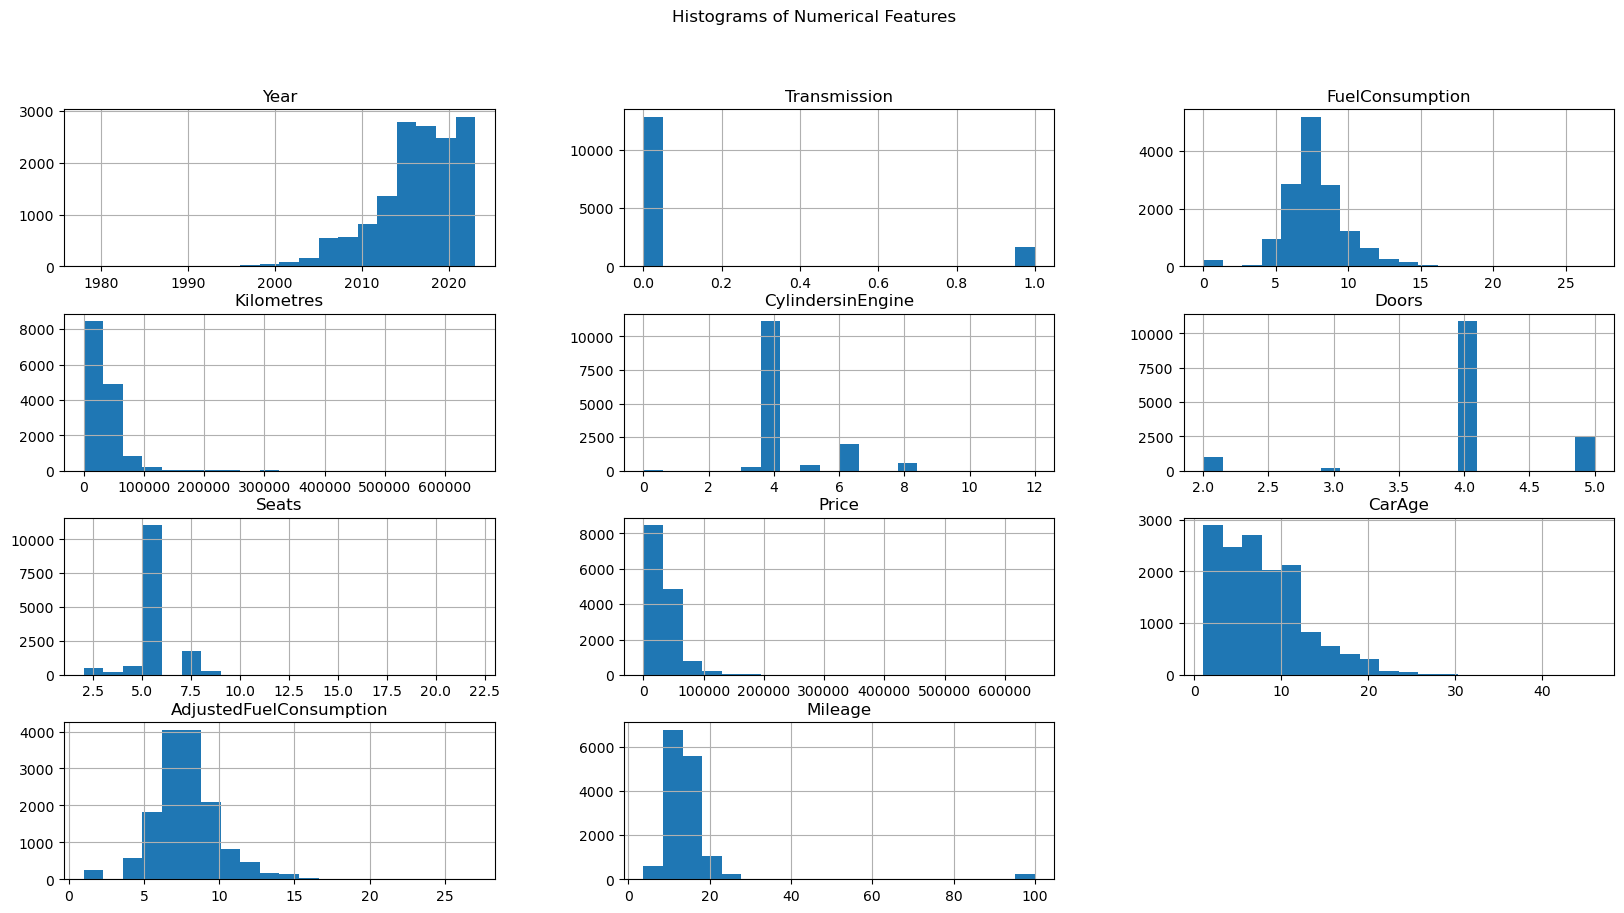

In [285]:
from matplotlib import pyplot as plt

df.hist(bins=20, figsize=(20, 10))
plt.suptitle('Histograms of Numerical Features')
plt.show()

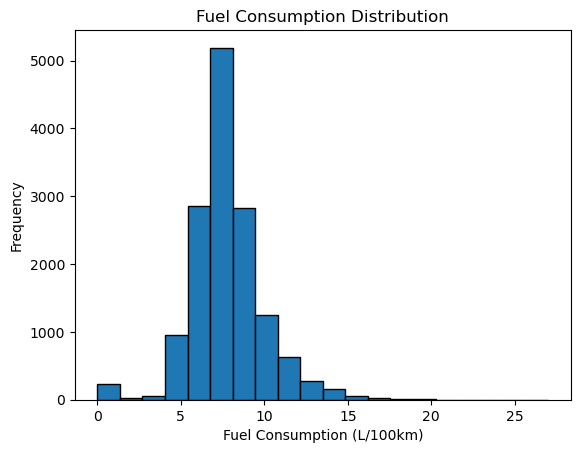

In [286]:
plt.hist(df['FuelConsumption'], bins=20, edgecolor='black')
plt.title('Fuel Consumption Distribution')
plt.xlabel('Fuel Consumption (L/100km)')
plt.ylabel('Frequency')
plt.show()

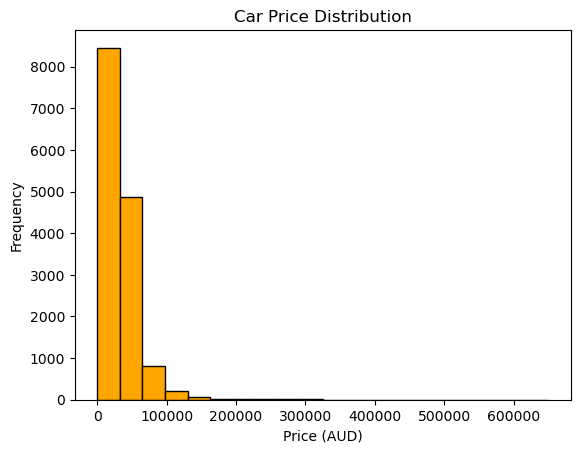

In [287]:
plt.hist(df['Price'], bins=20, color='orange', edgecolor='black')
plt.title('Car Price Distribution')
plt.xlabel('Price (AUD)')
plt.ylabel('Frequency')
plt.show()

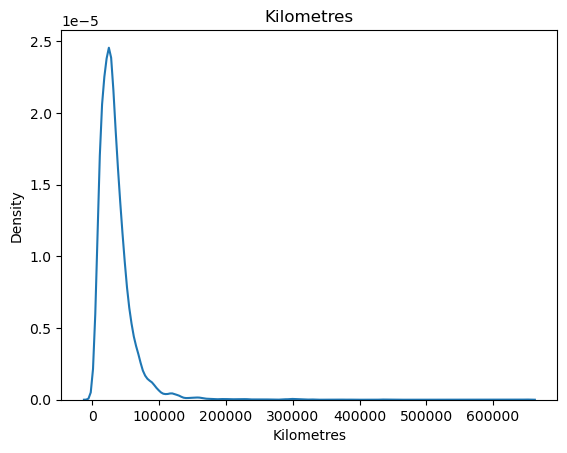

In [288]:
import seaborn as sns

sns.kdeplot(data=df, x='Kilometres')
plt.title("Kilometres")
plt.show()

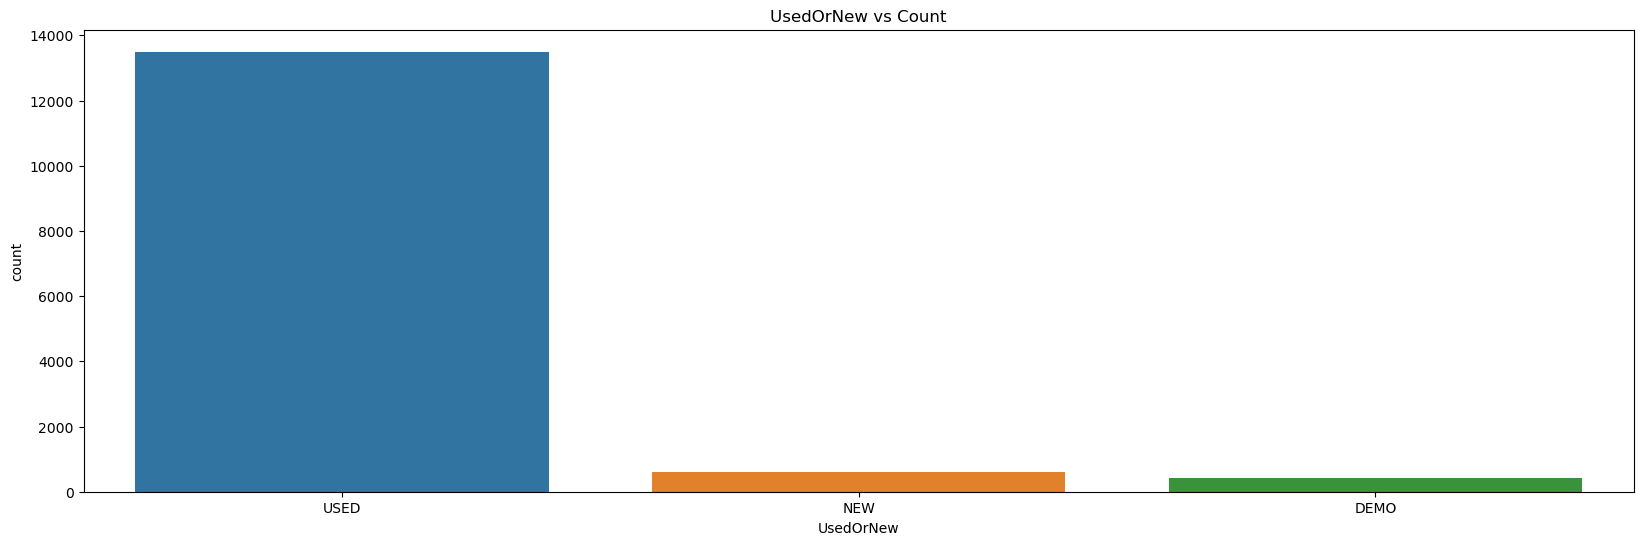

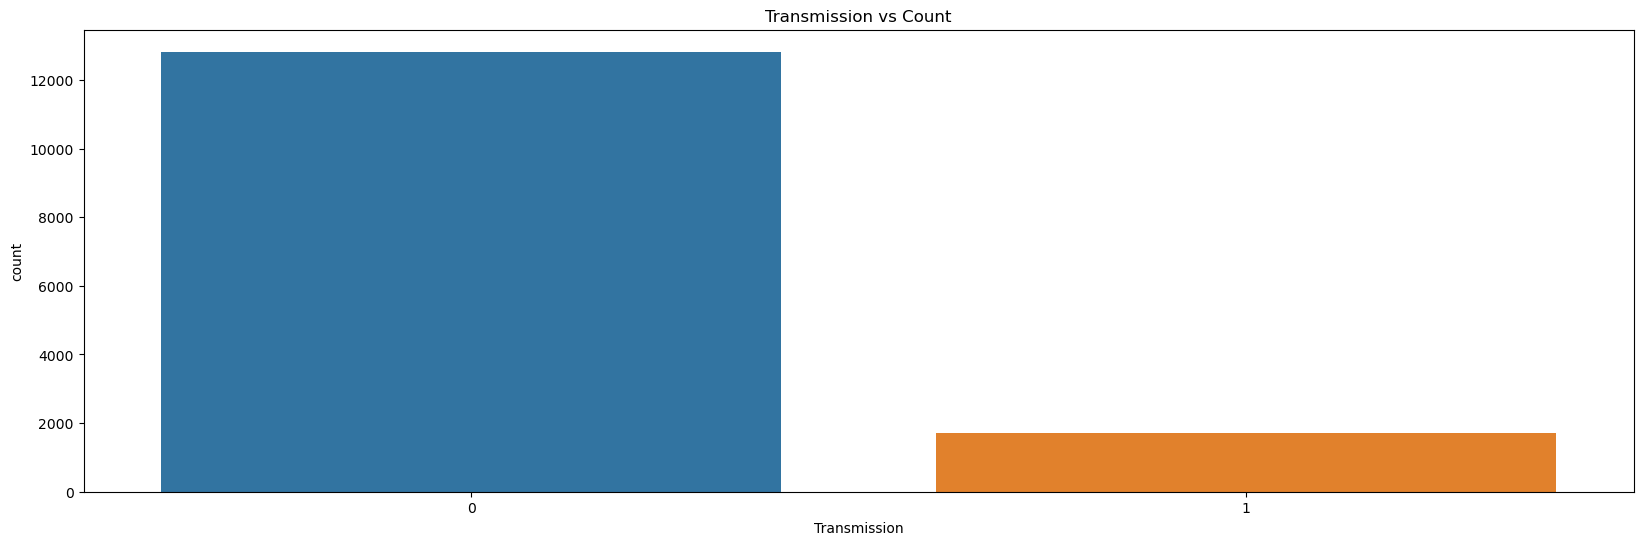

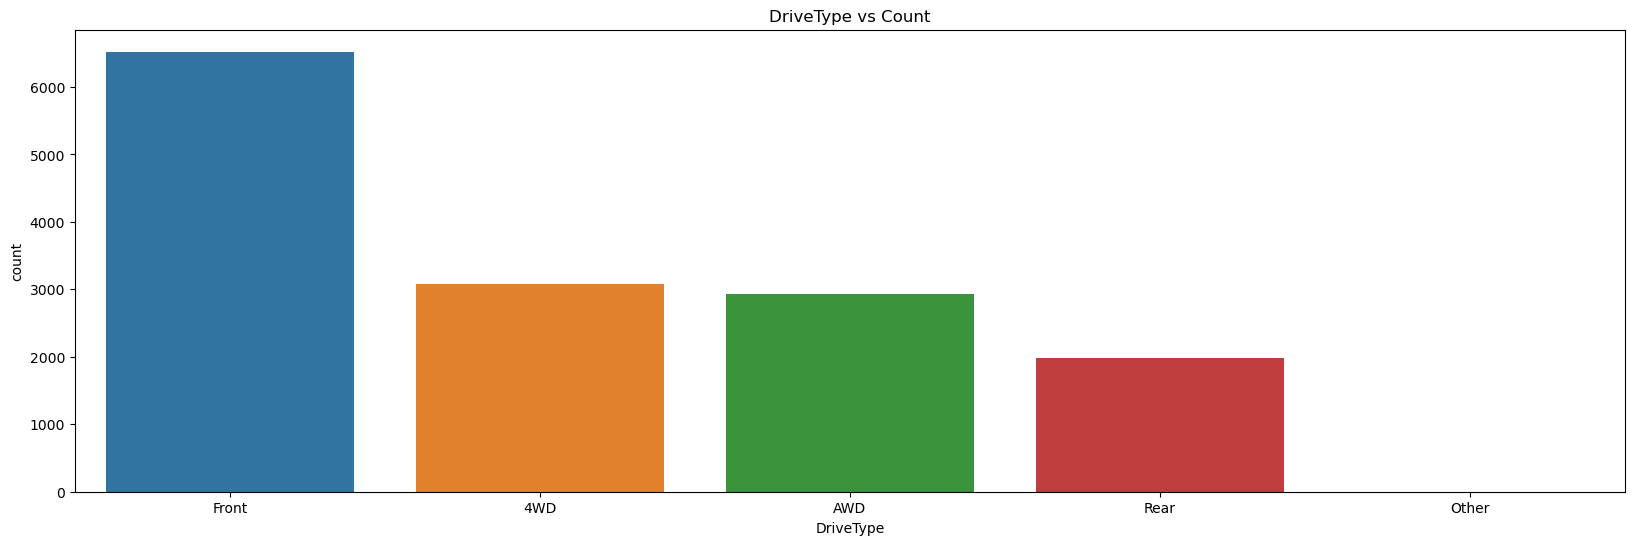

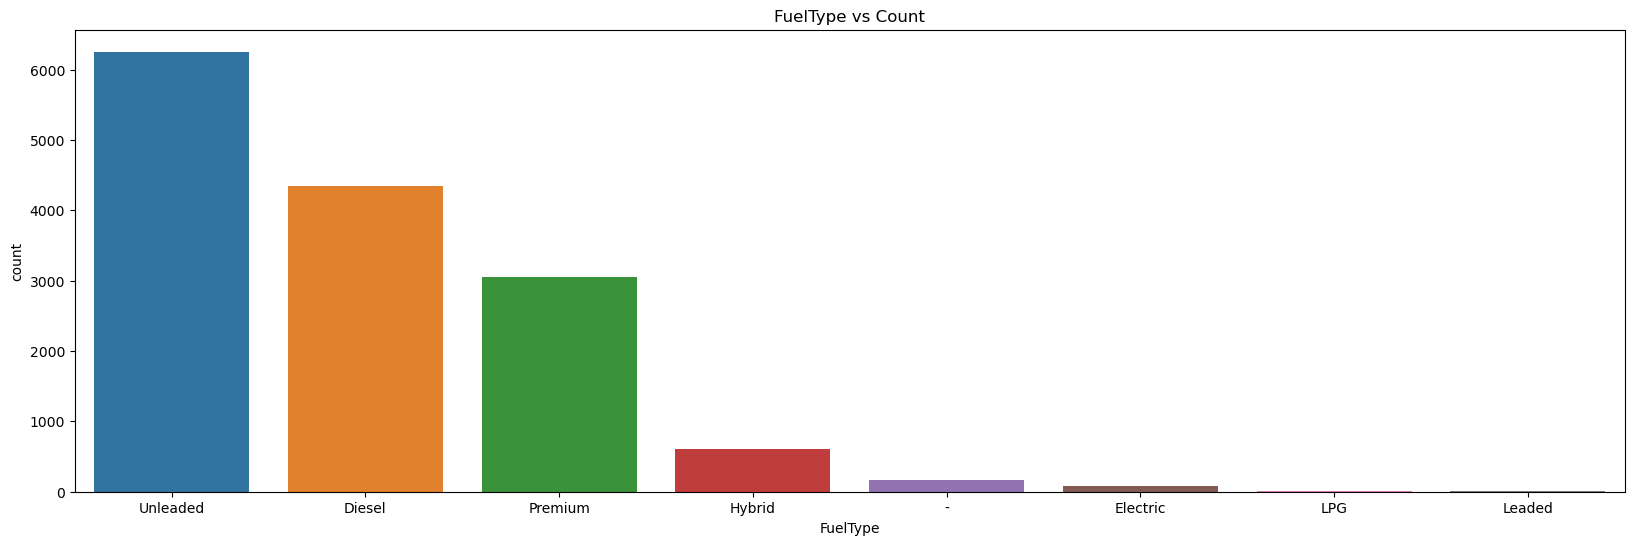

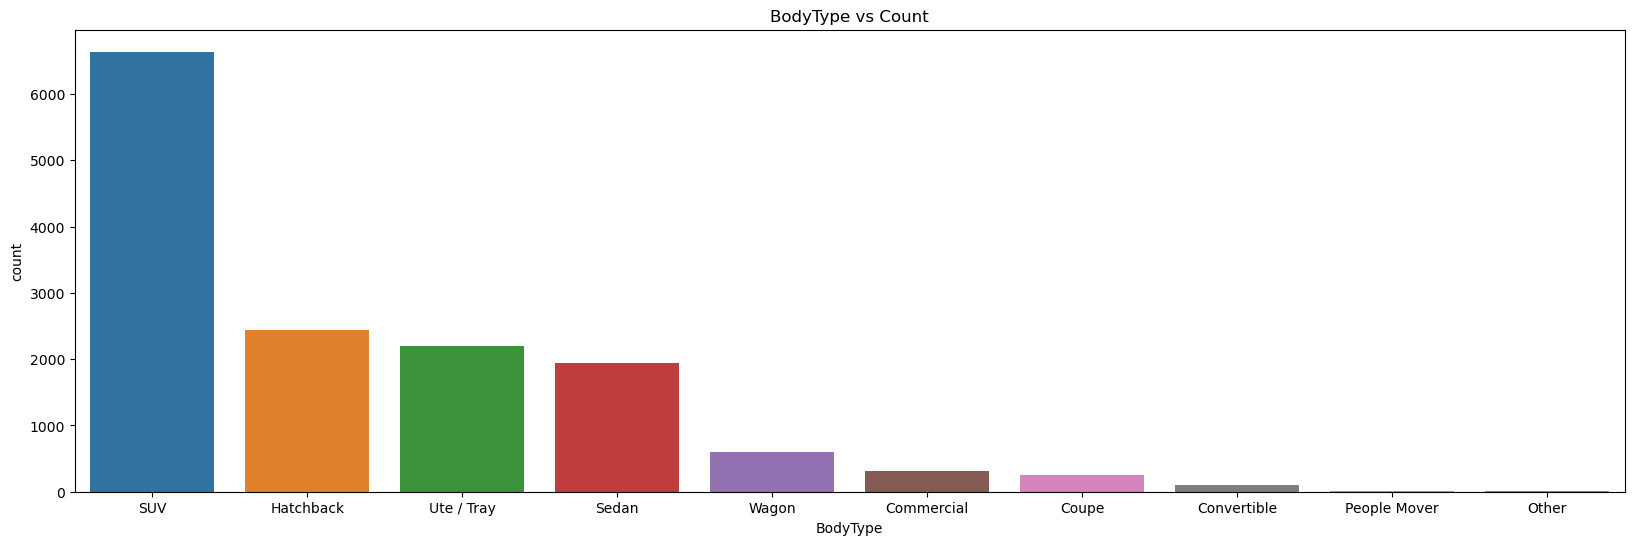

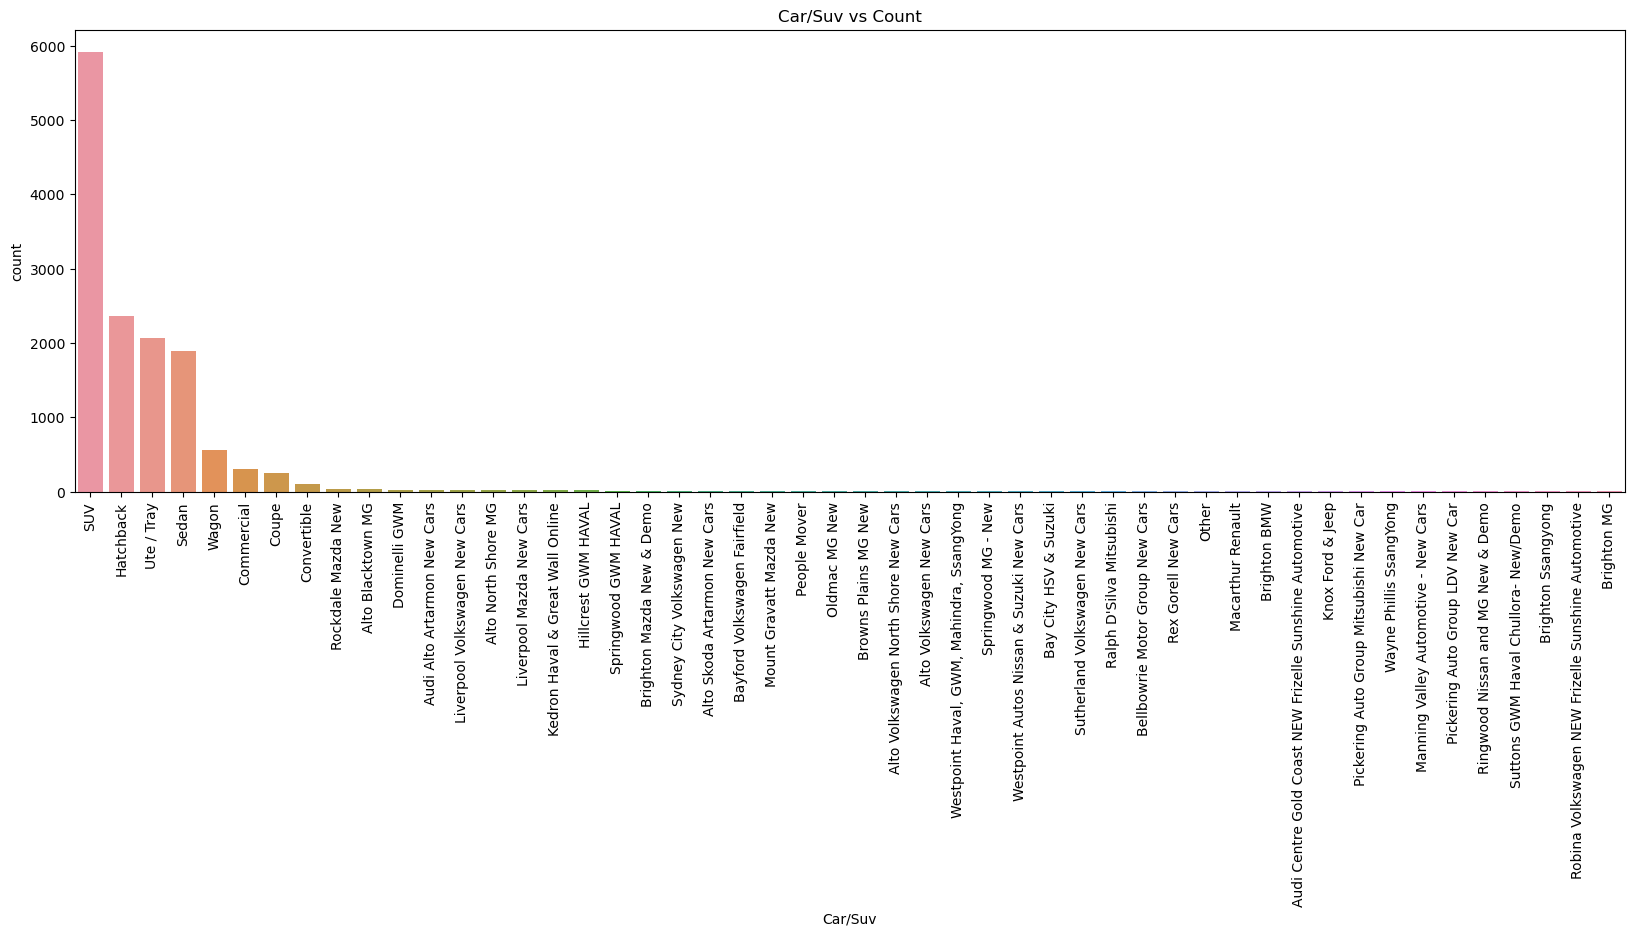

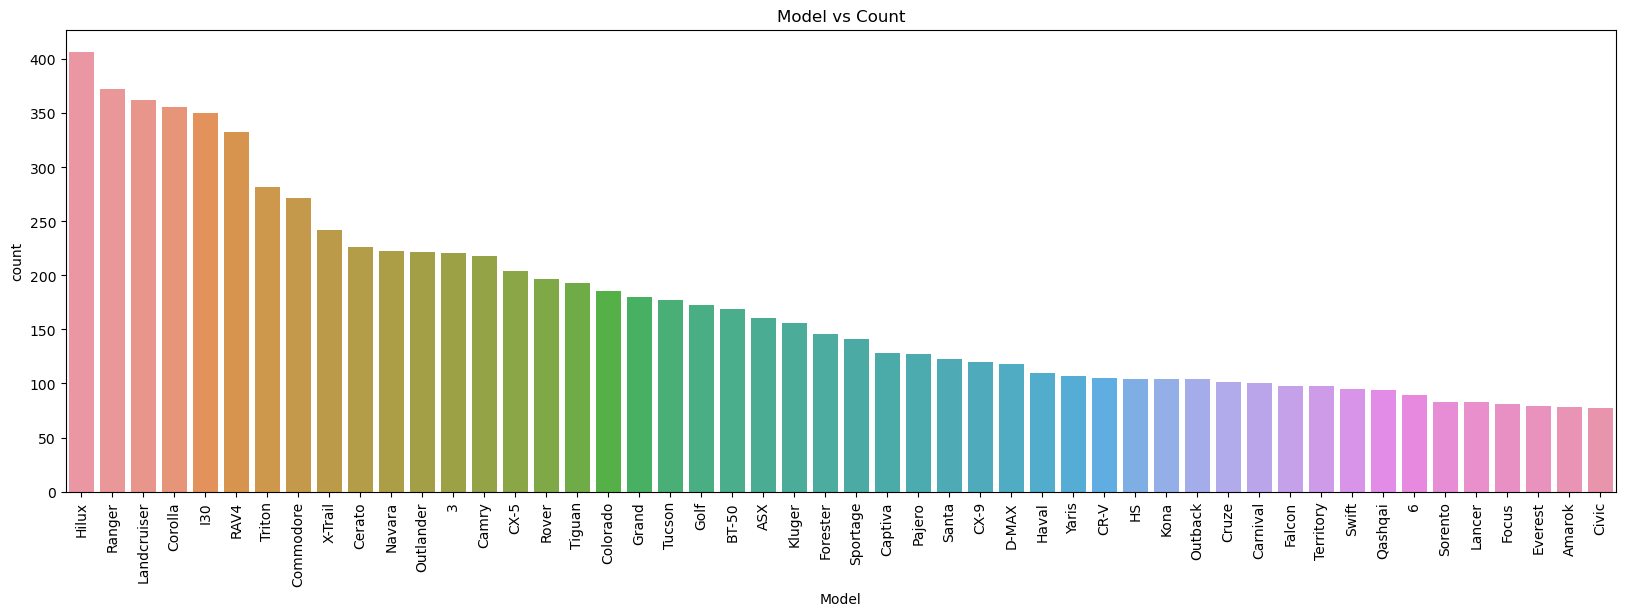

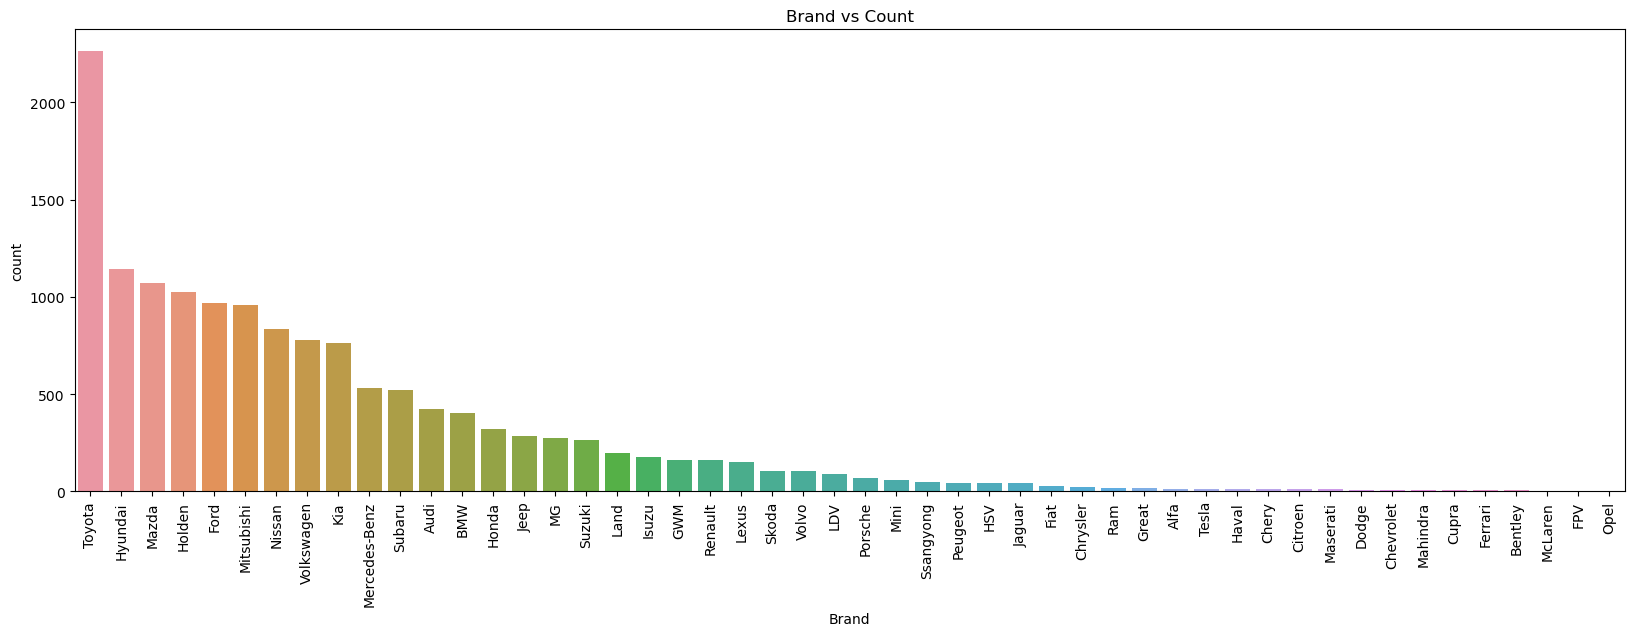

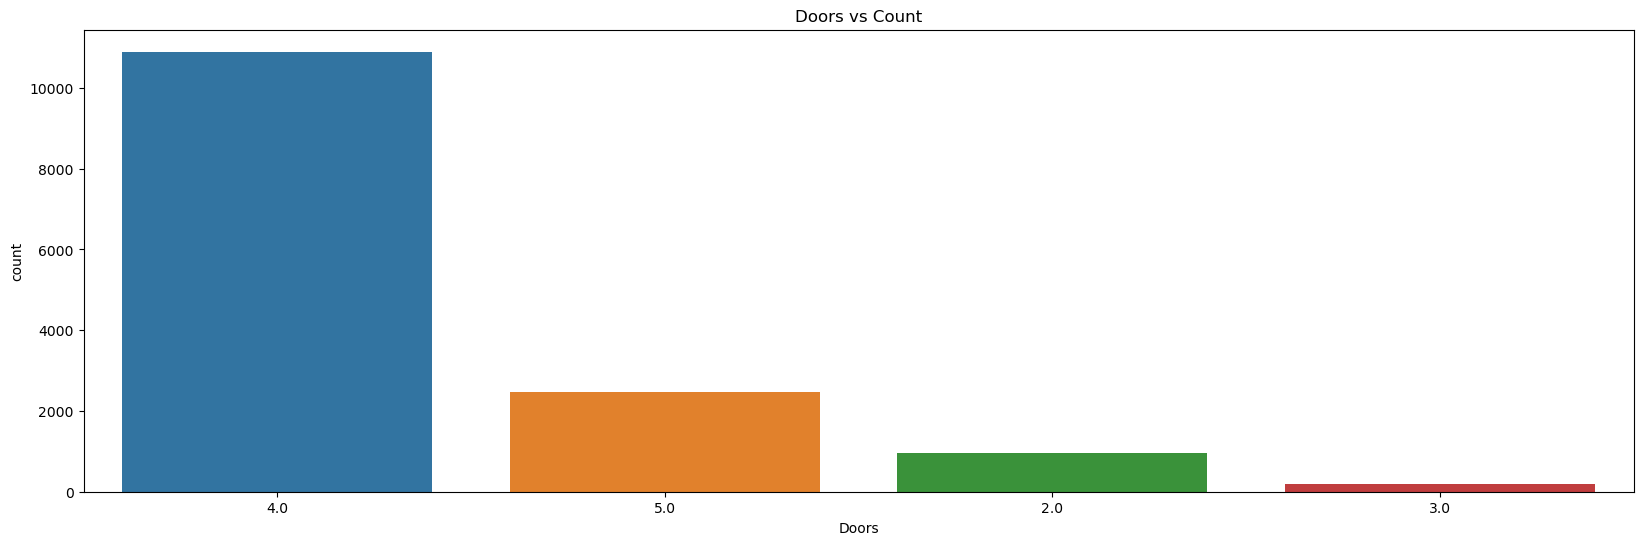

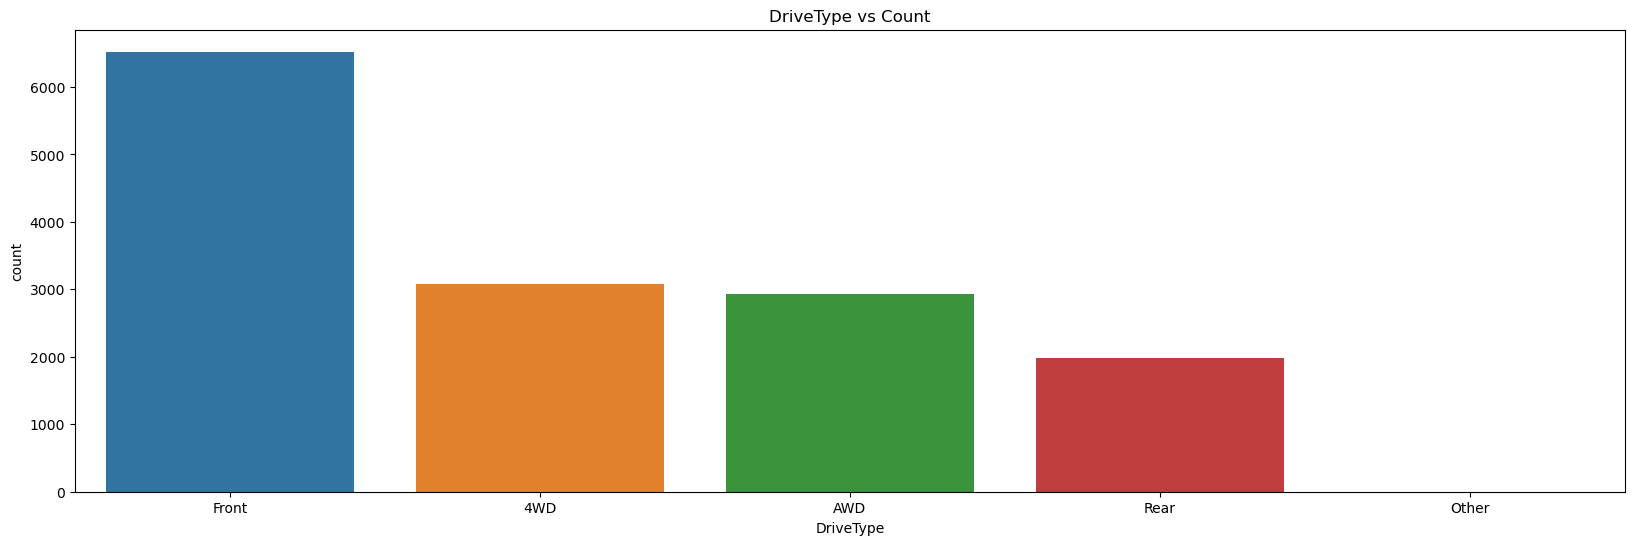

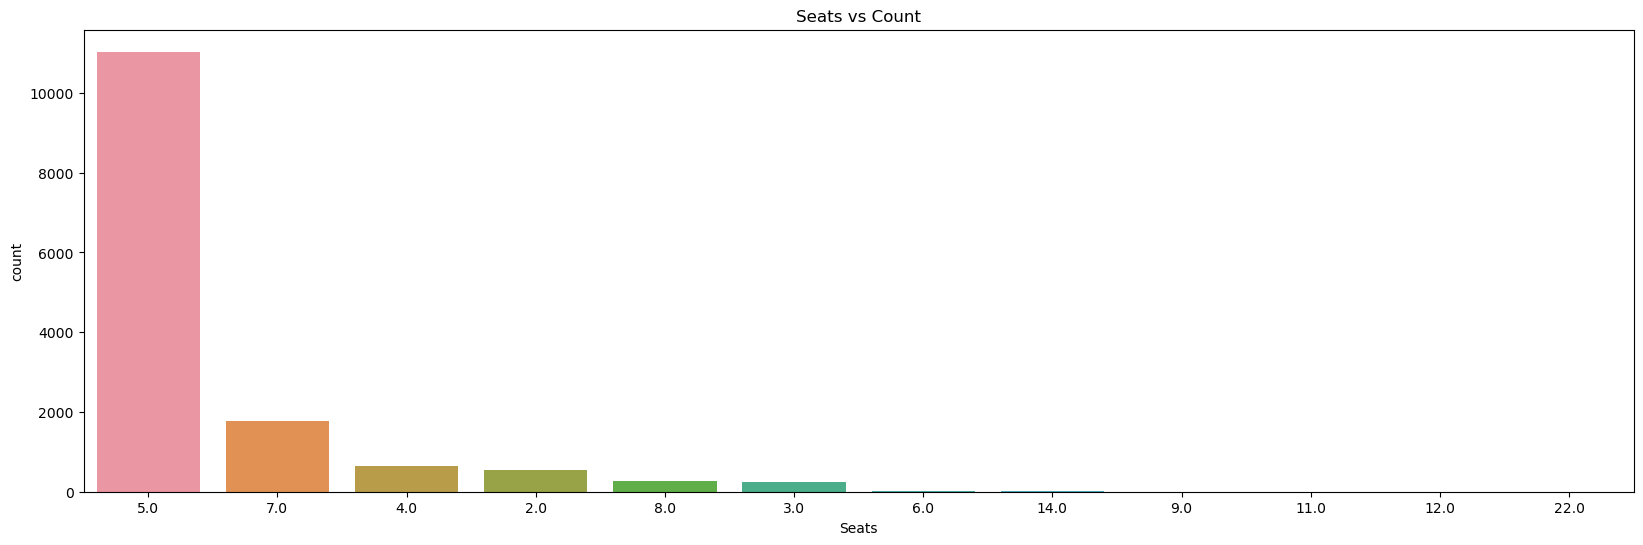

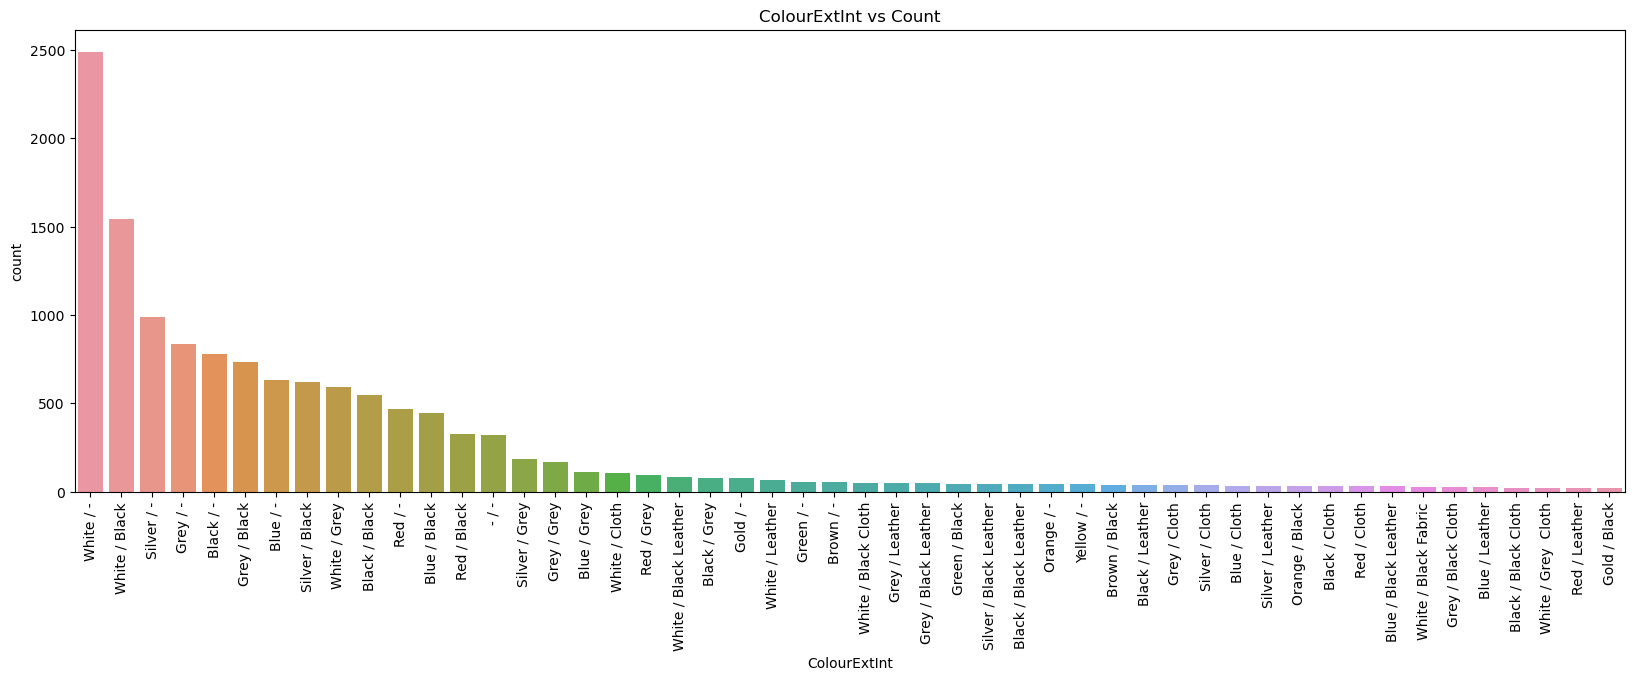

In [289]:
cols_to_plot = ['UsedOrNew', 'Transmission', 'DriveType', 'FuelType', 'BodyType', 'Car/Suv', 'Model', 'Brand', 'Doors',
                'DriveType',
                'Seats',
                'ColourExtInt']

for col in cols_to_plot:
    plt.figure(figsize=(20, 6))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index[:50])
    plt.title(f'{col} vs Count')
    if len(df[col].value_counts().index) > 50:
        plt.xticks(rotation=90)
    plt.show()

In [290]:
import plotly.express as px

px.bar(df, x='Model', y='Price', color='Model', range_x=[0, 10], title='Model vs Price')

In [291]:
px.bar(df, x='Brand', y='Price', color='Brand', range_x=[0, 10], title='Brand vs Price')

In [292]:
px.scatter(df, x='Price', y='Brand')
# px.bar(df, x='Kilometres', y='Price', color='Kilometres', title='Kilometres vs Price')

In [293]:
px.scatter(df, x='Model', y='Price')

In [294]:

fig = px.line(df, x='Kilometres', y='UsedOrNew', color='UsedOrNew', title='Distance(KM) vs UsedOrNew')

fig.show()

In [299]:
df.corr(numeric_only=True)

Year  Transmission  FuelConsumption  Kilometres  \
Year                     1.000000     -0.252024        -0.271547    0.433228   
Transmission            -0.252024      1.000000         0.044957   -0.108123   
FuelConsumption         -0.271547      0.044957         1.000000    0.090972   
Kilometres               0.433228     -0.108123         0.090972    1.000000   
CylindersinEngine       -0.237635      0.016993         0.593205    0.309897   
Doors                    0.117336     -0.179702        -0.253785   -0.130782   
Seats                    0.040960     -0.220099         0.046416    0.022768   
Price                    0.433228     -0.108123         0.090972    1.000000   
CarAge                  -1.000000      0.252024         0.271547   -0.433228   
AdjustedFuelConsumption -0.286509      0.050595         0.998627    0.097202   
Mileage                 -0.036209      0.046179        -0.678217    0.038659   

                         CylindersinEngine     Doors     Seats     Price  \
Year                             -0.237635  0.117336  0.040960  0.433228   
Transmission                      0.016993 -0.179702 -0.220099 -0.108123   
FuelConsumption                   0.593205 -0.253785  0.046416  0.090972   
Kilometres                        0.309897 -0.130782  0.022768  1.000000   
CylindersinEngine                 1.000000 -0.232042  0.026006  0.309897   
Doors                            -0.232042  1.000000  0.352326 -0.130782   
Seats                             0.026006  0.352326  1.000000  0.022768   
Price                             0.309897 -0.130782  0.022768  1.000000   
CarAge                            0.237635 -0.117336 -0.040960 -0.433228   
AdjustedFuelConsumption           0.601391 -0.264841  0.047195  0.097202   
Mileage                          -0.247043  0.021053 -0.026318  0.038659   

                           CarAge  AdjustedFuelConsumption   Mileage  
Year                    -1.000000                -0.286509 -0.036209  
Transmission             0.252024                 0.050595  0.046179  
FuelConsumption          0.271547                 0.998627 -0.678217  
Kilometres              -0.433228                 0.097202  0.038659  
CylindersinEngine        0.237635                 0.601391 -0.247043  
Doors                   -0.117336                -0.264841  0.021053  
Seats                   -0.040960                 0.047195 -0.026318  
Price                   -0.433228                 0.097202  0.038659  
CarAge                   1.000000                 0.286509  0.036209  
AdjustedFuelConsumption  0.286509                 1.000000 -0.639783  
Mileage                  0.036209                -0.639783  1.000000

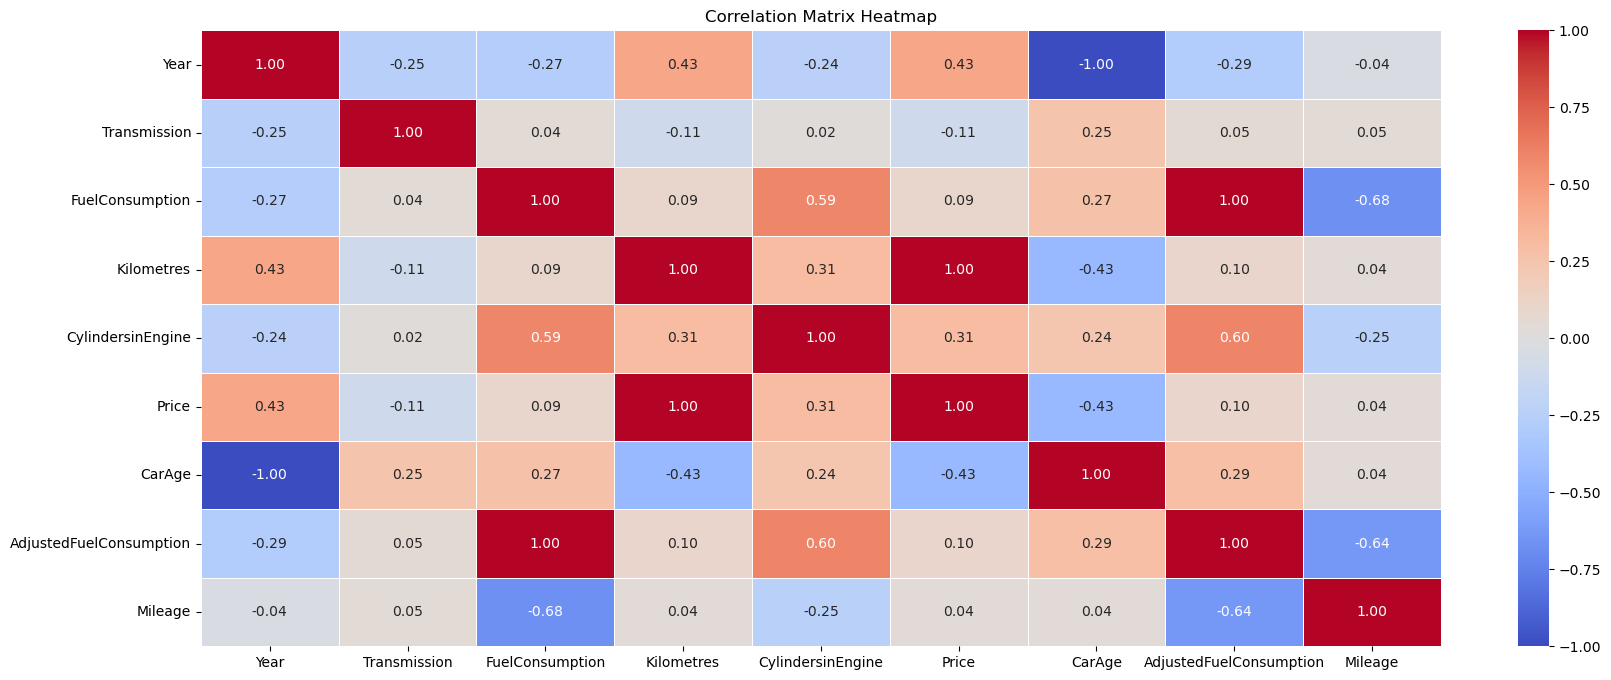

In [297]:
numerical_columns_features = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numerical_columns_features.corr()

# Create a heatmap
plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()